## Exploring the Pokemon database (SQLite)

In [1]:
#Loading the required libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Esablish connection to the SQLite database
con = sqlite3.connect("C:/Users/Sija/Desktop/Lantern/SQLite/pokedex.sqlite")
cur = con.cursor()

def sql_query(query):
    """This function executes an SQL query and fetch results.
    """
    cur.execute(query)
    return cur.fetchall()

In [3]:
# Command to see the list of tables in the DB

query = "SELECT name FROM sqlite_master WHERE type='table'"
sql_query(query)

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

In [4]:
sql_query("SELECT * FROM sqlite_master;")

[('table',
  'conquest_move_displacements',
  'conquest_move_displacements',
  2,
  'CREATE TABLE conquest_move_displacements (\n\tid INTEGER NOT NULL, \n\tidentifier VARCHAR(18) NOT NULL, \n\taffects_target BOOLEAN NOT NULL, \n\tPRIMARY KEY (id), \n\tCHECK (affects_target IN (0, 1))\n)'),
 ('table',
  'encounter_methods',
  'encounter_methods',
  3,
  'CREATE TABLE encounter_methods (\n\tid INTEGER NOT NULL, \n\tidentifier VARCHAR(16) NOT NULL, \n\t"order" INTEGER NOT NULL, \n\tPRIMARY KEY (id), \n\tUNIQUE (identifier), \n\tUNIQUE ("order")\n)'),
 ('index',
  'sqlite_autoindex_encounter_methods_1',
  'encounter_methods',
  4,
  None),
 ('index',
  'sqlite_autoindex_encounter_methods_2',
  'encounter_methods',
  5,
  None),
 ('table',
  'move_targets',
  'move_targets',
  6,
  'CREATE TABLE move_targets (\n\tid INTEGER NOT NULL, \n\tidentifier VARCHAR(32) NOT NULL, \n\tPRIMARY KEY (id)\n)'),
 ('table',
  'berry_firmness',
  'berry_firmness',
  7,
  'CREATE TABLE berry_firmness (\n\tid 

### Types :

In [5]:
# Query to output the type_id, name for different type of Pokemon and only when the language is English.

sql_query("SELECT type_id , name FROM type_names WHERE local_language_id = 9;")

[(1, 'Normal'),
 (2, 'Fighting'),
 (3, 'Flying'),
 (4, 'Poison'),
 (5, 'Ground'),
 (6, 'Rock'),
 (7, 'Bug'),
 (8, 'Ghost'),
 (9, 'Steel'),
 (10, 'Fire'),
 (11, 'Water'),
 (12, 'Grass'),
 (13, 'Electric'),
 (14, 'Psychic'),
 (15, 'Ice'),
 (16, 'Dragon'),
 (17, 'Dark'),
 (10001, '???'),
 (10002, 'Shadow')]

### Gen 1 moves :

In [6]:
# Query to output the name of the move and name of the type for Generation 1 Pokemon. 
##look into move_names,moves and type_names tables

sql_query("SELECT DISTINCT identifier, type_names.name \n
          FROM moves LEFT JOIN type_names on moves.type_id = type_names.type_id \n
          WHERE moves.generation_id = 1 \n
          AND type_names.local_language_id = 9 \n
          ORDER BY moves.type_id ASC;")

[('pound', 'Normal'),
 ('doubleslap', 'Normal'),
 ('comet-punch', 'Normal'),
 ('mega-punch', 'Normal'),
 ('pay-day', 'Normal'),
 ('scratch', 'Normal'),
 ('vicegrip', 'Normal'),
 ('guillotine', 'Normal'),
 ('razor-wind', 'Normal'),
 ('swords-dance', 'Normal'),
 ('cut', 'Normal'),
 ('whirlwind', 'Normal'),
 ('bind', 'Normal'),
 ('slam', 'Normal'),
 ('stomp', 'Normal'),
 ('mega-kick', 'Normal'),
 ('headbutt', 'Normal'),
 ('horn-attack', 'Normal'),
 ('fury-attack', 'Normal'),
 ('horn-drill', 'Normal'),
 ('tackle', 'Normal'),
 ('body-slam', 'Normal'),
 ('wrap', 'Normal'),
 ('take-down', 'Normal'),
 ('thrash', 'Normal'),
 ('double-edge', 'Normal'),
 ('tail-whip', 'Normal'),
 ('leer', 'Normal'),
 ('growl', 'Normal'),
 ('roar', 'Normal'),
 ('sing', 'Normal'),
 ('supersonic', 'Normal'),
 ('sonicboom', 'Normal'),
 ('disable', 'Normal'),
 ('hyper-beam', 'Normal'),
 ('strength', 'Normal'),
 ('growth', 'Normal'),
 ('quick-attack', 'Normal'),
 ('rage', 'Normal'),
 ('mimic', 'Normal'),
 ('screech', '

### It is hard to write custom queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

In [7]:
# Use "for loops" to read each table in the DB and store it as a df with the same name as the table.

#creating the list of tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_list = cur.fetchall()

df_name = ''

#Looping through the table names to load the table
for files in table_list:
    df_name = files[0]+'_df'
    print(df_name)
        
    query = 'SELECT * FROM {table_name};'.format(table_name = files[0])
    df_name = pd.read_sql(query, con)
    print("Columns in the loaded DF is :", df_name.columns)

conquest_move_displacements_df
Columns in the loaded DF is : Index(['id', 'identifier', 'affects_target'], dtype='object')
encounter_methods_df
Columns in the loaded DF is : Index(['id', 'identifier', 'order'], dtype='object')
move_targets_df
Columns in the loaded DF is : Index(['id', 'identifier'], dtype='object')
berry_firmness_df
Columns in the loaded DF is : Index(['id', 'identifier'], dtype='object')
pokemon_move_methods_df
Columns in the loaded DF is : Index(['id', 'identifier'], dtype='object')
conquest_warrior_stats_df
Columns in the loaded DF is : Index(['id', 'identifier'], dtype='object')
item_flags_df
Columns in the loaded DF is : Index(['id', 'identifier'], dtype='object')
item_fling_effects_df
Columns in the loaded DF is : Index(['id'], dtype='object')
item_pockets_df
Columns in the loaded DF is : Index(['id', 'identifier'], dtype='object')
move_damage_classes_df
Columns in the loaded DF is : Index(['id', 'identifier'], dtype='object')
evolution_triggers_df
Columns in the

Columns in the loaded DF is : Index(['conquest_move_effect_id', 'local_language_id', 'short_effect',
       'effect'],
      dtype='object')
natures_df
Columns in the loaded DF is : Index(['id', 'identifier', 'decreased_stat_id', 'increased_stat_id',
       'hates_flavor_id', 'likes_flavor_id'],
      dtype='object')
stat_names_df
Columns in the loaded DF is : Index(['stat_id', 'local_language_id', 'name'], dtype='object')
pokedex_prose_df
Columns in the loaded DF is : Index(['pokedex_id', 'local_language_id', 'name', 'description'], dtype='object')
stat_hints_df
Columns in the loaded DF is : Index(['id', 'stat_id', 'gene_mod_5'], dtype='object')
conquest_episode_warriors_df
Columns in the loaded DF is : Index(['episode_id', 'warrior_id'], dtype='object')
generations_df
Columns in the loaded DF is : Index(['id', 'main_region_id', 'canonical_pokedex_id', 'identifier'], dtype='object')
conquest_warrior_names_df
Columns in the loaded DF is : Index(['warrior_id', 'local_language_id', 'name

Columns in the loaded DF is : Index(['first_move_id', 'second_move_id'], dtype='object')
conquest_pokemon_moves_df
Columns in the loaded DF is : Index(['pokemon_species_id', 'move_id'], dtype='object')
machines_df
Columns in the loaded DF is : Index(['machine_number', 'version_group_id', 'item_id', 'move_id'], dtype='object')
move_effect_changelog_prose_df
Columns in the loaded DF is : Index(['move_effect_changelog_id', 'local_language_id', 'effect'], dtype='object')
pokemon_dex_numbers_df
Columns in the loaded DF is : Index(['species_id', 'pokedex_id', 'pokedex_number'], dtype='object')
pokemon_species_flavor_summaries_df
Columns in the loaded DF is : Index(['pokemon_species_id', 'local_language_id', 'flavor_summary'], dtype='object')
berry_flavors_df
Columns in the loaded DF is : Index(['berry_id', 'contest_type_id', 'flavor'], dtype='object')
pokemon_species_prose_df
Columns in the loaded DF is : Index(['pokemon_species_id', 'local_language_id', 'form_description'], dtype='object')


In [8]:
#close connection to DB
cur.close()
con.close()

## Data exploration using Pandas:

Download another Pokemon dataset from here :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 

In [29]:
#Reading csv file as dataframe
df = pd.read_csv('C:/Users/Sija/Desktop/Lantern/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [30]:
#Let's rename the # column to id, and convert all column labels to lower case.
# use df.rename to rename the # column to id
# use df.columns.str.lower() to convert all column labels to lower case

df.rename(columns={'#':'id'}, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [31]:
#Now let's take a look at any duplicated rows via the id column.

df.loc[df.duplicated('id', keep=False)].head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [32]:
# Lets exclude these duplicates in our analysis except for the first instance.

df.drop_duplicates('id', keep='first', inplace=True)
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [33]:
# There should be no duplicats anymore if you check :
df.loc[df.duplicated('id', keep=False)].head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary


In [16]:
df['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
6      Flying
9         NaN
10        NaN
11        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
20     Flying
21     Flying
22     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
        ...  
762       NaN
763       NaN
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
784     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [17]:
# Fill the Nan values
df['type 2'].fillna('None', inplace = True)
df['type 2'].head(10)

0     Poison
1     Poison
2     Poison
4       None
5       None
6     Flying
9       None
10      None
11      None
13      None
Name: type 2, dtype: object

In [18]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
# create pokedex with these columns: ['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']
pokedex = df[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']].copy()
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False
5,5,Charmeleon,Fire,None,1,False


In [19]:
# create poke_statistics with these columns:['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']
poke_statistics = df[['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']].copy()
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


In [20]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [27]:
# create a groupby to see below :
gen_df = pokedex.groupby('generation')
gen_df.describe()

id                                                       
            count   mean        std    min     25%    50%     75%    max
generation                                                              
1           151.0   76.0  43.734045    1.0   38.50   76.0  113.50  151.0
2           100.0  201.5  29.011492  152.0  176.75  201.5  226.25  251.0
3           135.0  319.0  39.115214  252.0  285.50  319.0  352.50  386.0
4           107.0  440.0  31.032241  387.0  413.50  440.0  466.50  493.0
5           156.0  571.5  45.177428  494.0  532.75  571.5  610.25  649.0
6            72.0  685.5  20.928450  650.0  667.75  685.5  703.25  721.0

Text(0.5,0,'Generation')

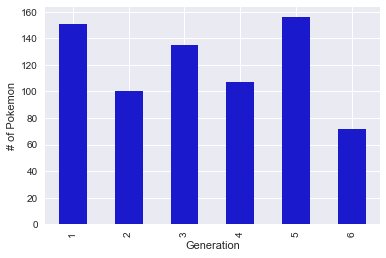

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

# create plot below :
gen_df['id'].count().plot(kind='bar', color=(0.1, 0.1, 0.8, 1))
plt.ylabel('# of Pokemon')
plt.xlabel('Generation')

### Try Seaboarn:

In [30]:
import seaborn as sb

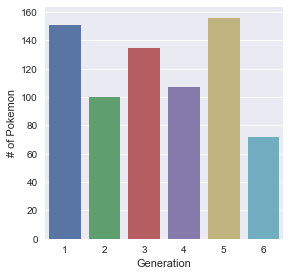

In [32]:
sb.set()
sb.factorplot(kind='count', data=pokedex, x='generation').set_axis_labels("Generation", "# of Pokemon")

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

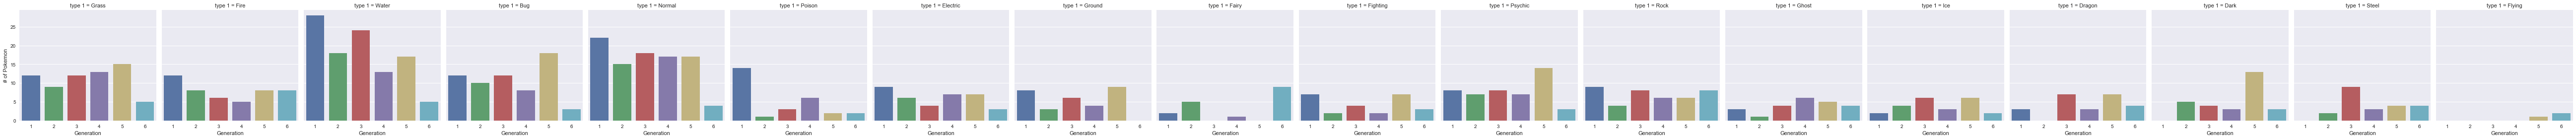

In [34]:
sb.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

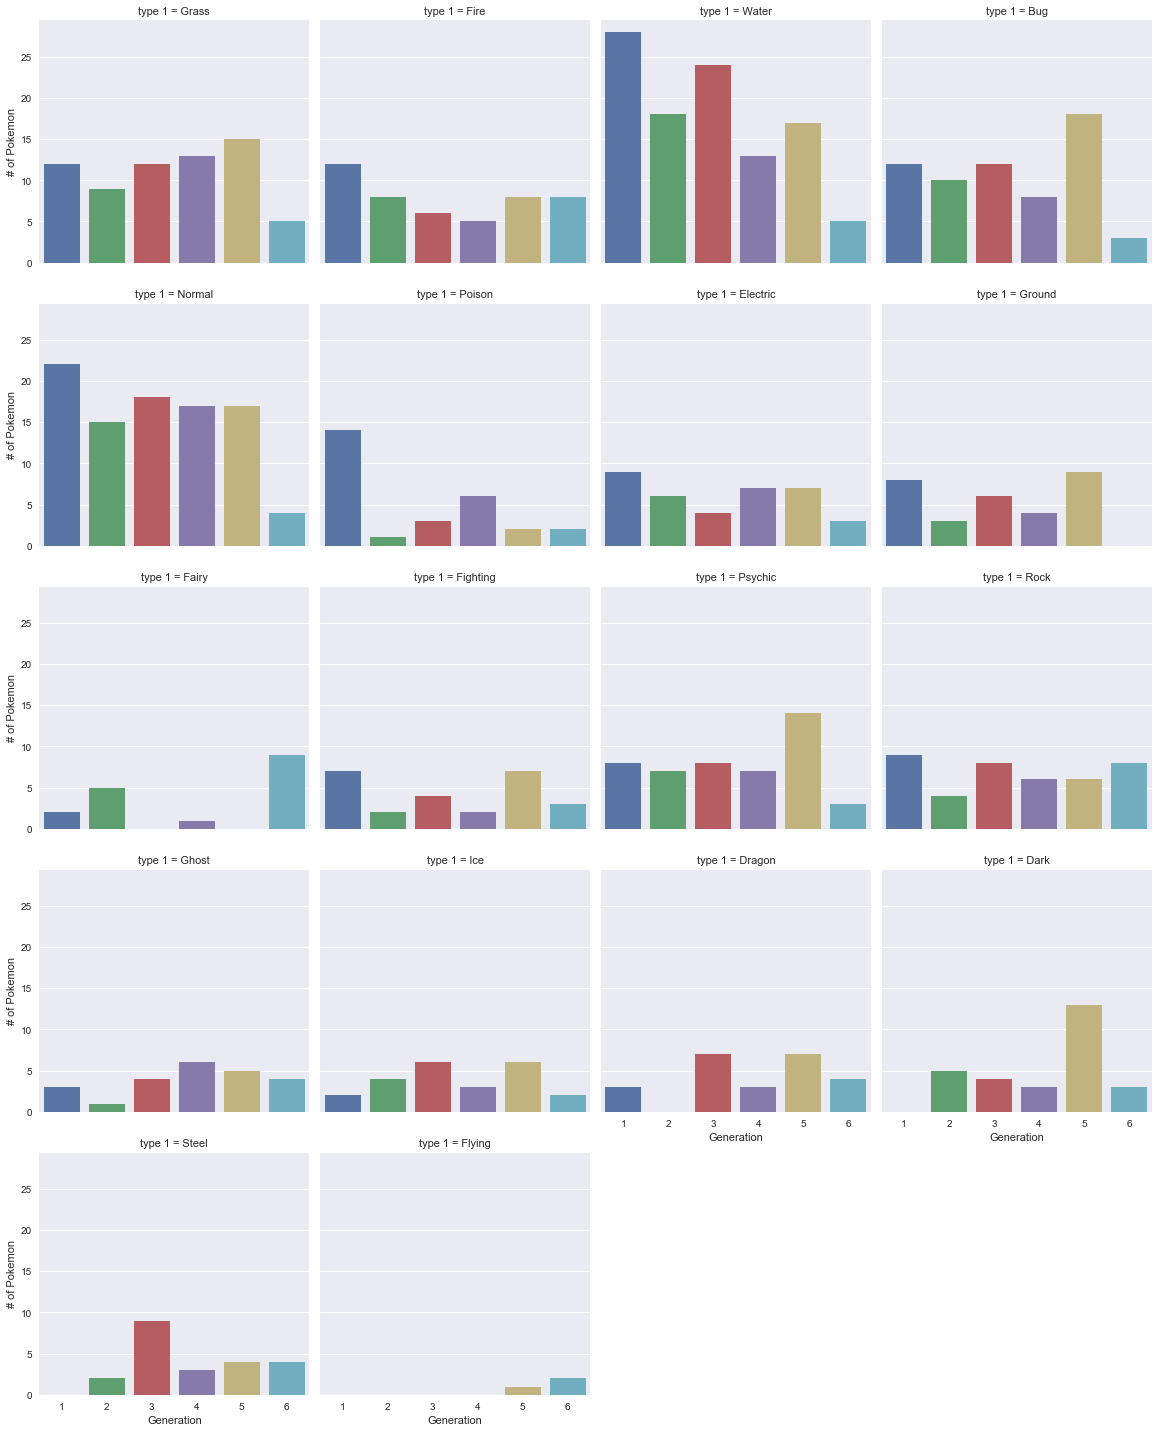

In [35]:
# Add col_wrap option to the above to get below (look into sb.factorplot documentation)
sb.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation', col_wrap=4).set_axis_labels("Generation", "# of Pokemon")

##### Summarizing observations/conclusions :
  - Normal and Water type Pokemons were higher in numbers across all generations, compared to other types. 
  - Flying type pokemons were introduced only in the later generations of 5 and 6
  - Generation 6 on an average have fewer number of Pokemon types

### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [36]:
unique_type1 =  np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [37]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2

array(['None'], dtype=object)

##### There are no unique primary or secondary types

In [39]:
# Get The total number of primary and secondary types:
primary_count = pokedex['type 1'].nunique()
print("# of Type1 Pokemon: ", primary_count)
secondary_count = pokedex['type 2'].nunique()
print("# of Type2 Pokemon: ", secondary_count)

# of Type1 Pokemon:  18
# of Type2 Pokemon:  19


### What are the most common types of Pokemon?

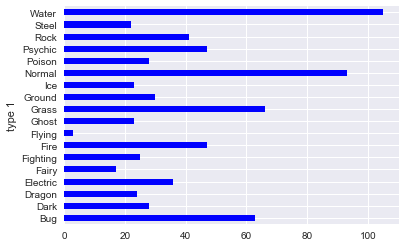

In [40]:
# Make a plot of the distribution of the Type 1 Pokemon. 
pokedex.groupby('type 1')['id'].count().plot(kind='barh', color ='b')

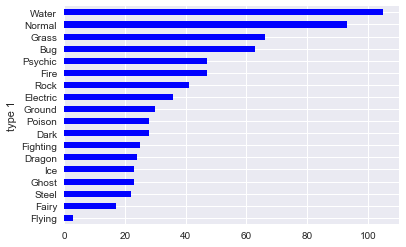

In [41]:
#Sort the DB so that we see it in an ascending order !
pokedex.groupby('type 1')['id'].count().sort_values(ascending=True).plot(kind='barh', color ='b')

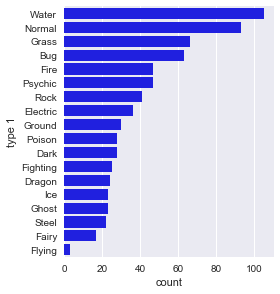

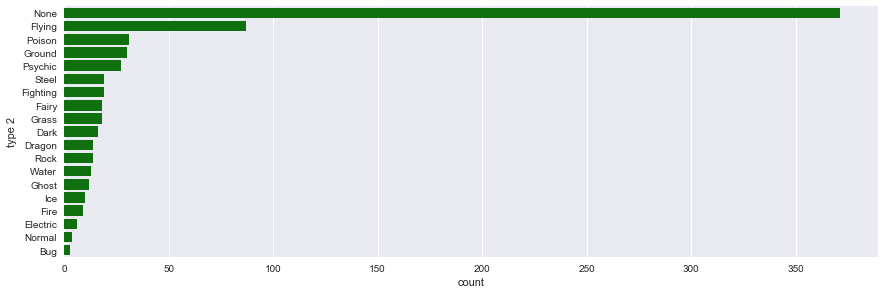

In [42]:
# Let us now try Seaborn:
sb.factorplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sb.factorplot(data=pokedex,
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=3.1)

#### Summarizing observations/conclusions :
- Most of the Pokemons do not have a type 2/secondary characteristics.
- Pokemon with a primary Flying type is considerably lower in number compared to other primary types. However, 
  there are many Pokemons with secondary Flying type 

### But we can not say which type maps into which type !

Lets create a heatmap !

In [44]:
# Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2
dual_types = pokedex[pokedex['type 2'] != 'None']
dual_types.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False


In [45]:
# Get a grid of values from 'type 1' 'type 2'  
data_grid = dual_types.groupby(['type 1','type 2'])['id'].size().unstack()
data_grid.shape

(18, 18)

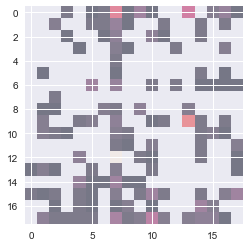

In [46]:
# Try matplotlib imshow as a way to get a heatmap :
plt.imshow(data_grid, aspect=1, alpha = .5)

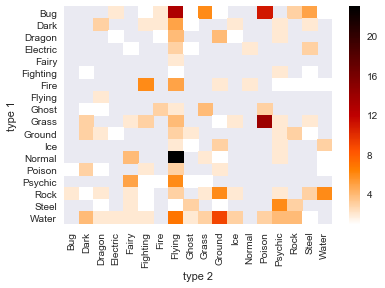

In [48]:
# Use seaborn heatmap option :

sb.heatmap(data_grid, cmap =('gist_heat_r'))

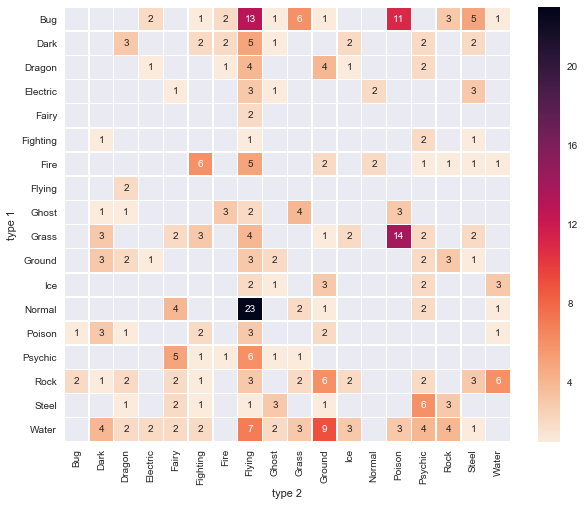

In [50]:
# Refine seaborn expression to get a better heatmap :
plt.figure(figsize=(10, 8))
sb.heatmap(data_grid, cmap='rocket_r', annot = True, linewidth =.5)

#### Summarizing observations/conclusions :
- Normal/Flying is the most common type combinations in a Pokemon. This is followed by Grass/Poison  and Bug/Flying types
- Flying is the most popular secondary type in Pokemons.
- Pokemon with Water as primary type is most likely to have a secondary type as well. 

### Are any of the statistics correlated?

In [13]:
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


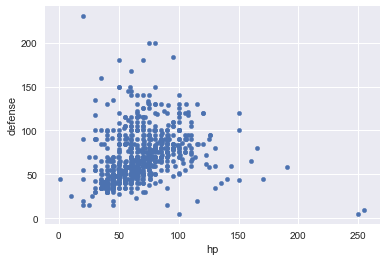

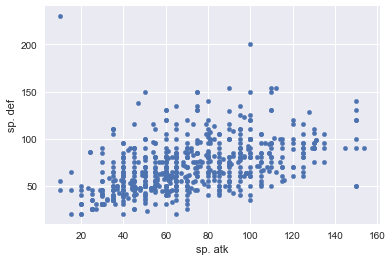

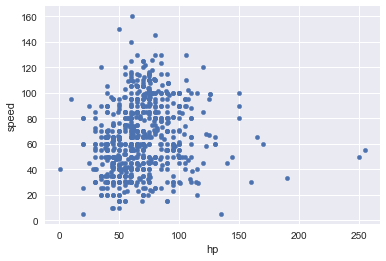

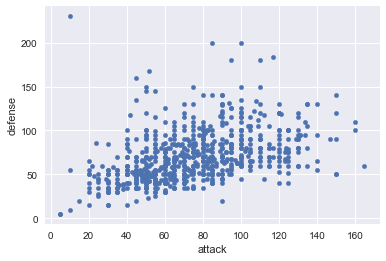

In [15]:
# Plot differernt combinations of quantities and see if any correlation :

poke_statistics.plot.scatter(x='hp', y='defense')
poke_statistics.plot.scatter(x='sp. atk', y='sp. def')
poke_statistics.plot.scatter(x='hp', y='speed')
poke_statistics.plot.scatter(x='attack', y='defense')

In [16]:
# It seems hard to see the correlation based on the scatter plots. Instead, use "pearsonr" function from scipy's "stats" library to compute the correlation 
from scipy import stats
stats.pearsonr(poke_statistics['hp'],poke_statistics['defense']) 

(0.23417725028263225, 1.9426273224356412e-10)

In [17]:
stats.pearsonr(poke_statistics['sp. atk'],poke_statistics['sp. def']) 

(0.4930378568268582, 1.9762926999484044e-45)

In [18]:
stats.pearsonr(poke_statistics['attack'],poke_statistics['defense'])

(0.4340218261332669, 1.7645656275400398e-34)

In [19]:
column_list = poke_statistics.columns
len(column_list)

8

In [20]:
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients
column_list = poke_statistics.columns
corr_coef = []

for i in column_list:
    for j in column_list:
        coef = round(stats.pearsonr(poke_statistics[i],poke_statistics[j])[0],4)
        corr_coef.append(coef)
#        print("The corr coef of '{}' and '{}' is {}" .format(i,j,coef))

print("The sorted Correlation coefficients are ",  sorted(corr_coef))

The sorted Correlation coefficients are  [-0.0068, -0.0068, 0.0282, 0.0282, 0.105, 0.105, 0.1075, 0.1075, 0.1151, 0.1151, 0.1265, 0.1265, 0.1445, 0.1445, 0.1604, 0.1604, 0.17, 0.17, 0.2022, 0.2022, 0.2083, 0.2083, 0.2342, 0.2342, 0.2365, 0.2365, 0.3322, 0.3322, 0.3397, 0.3397, 0.3626, 0.3626, 0.3826, 0.3826, 0.4258, 0.4258, 0.434, 0.434, 0.4395, 0.4395, 0.48, 0.48, 0.493, 0.493, 0.5489, 0.5489, 0.6058, 0.6058, 0.6426, 0.6426, 0.7042, 0.7042, 0.7072, 0.7072, 0.7231, 0.7231, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


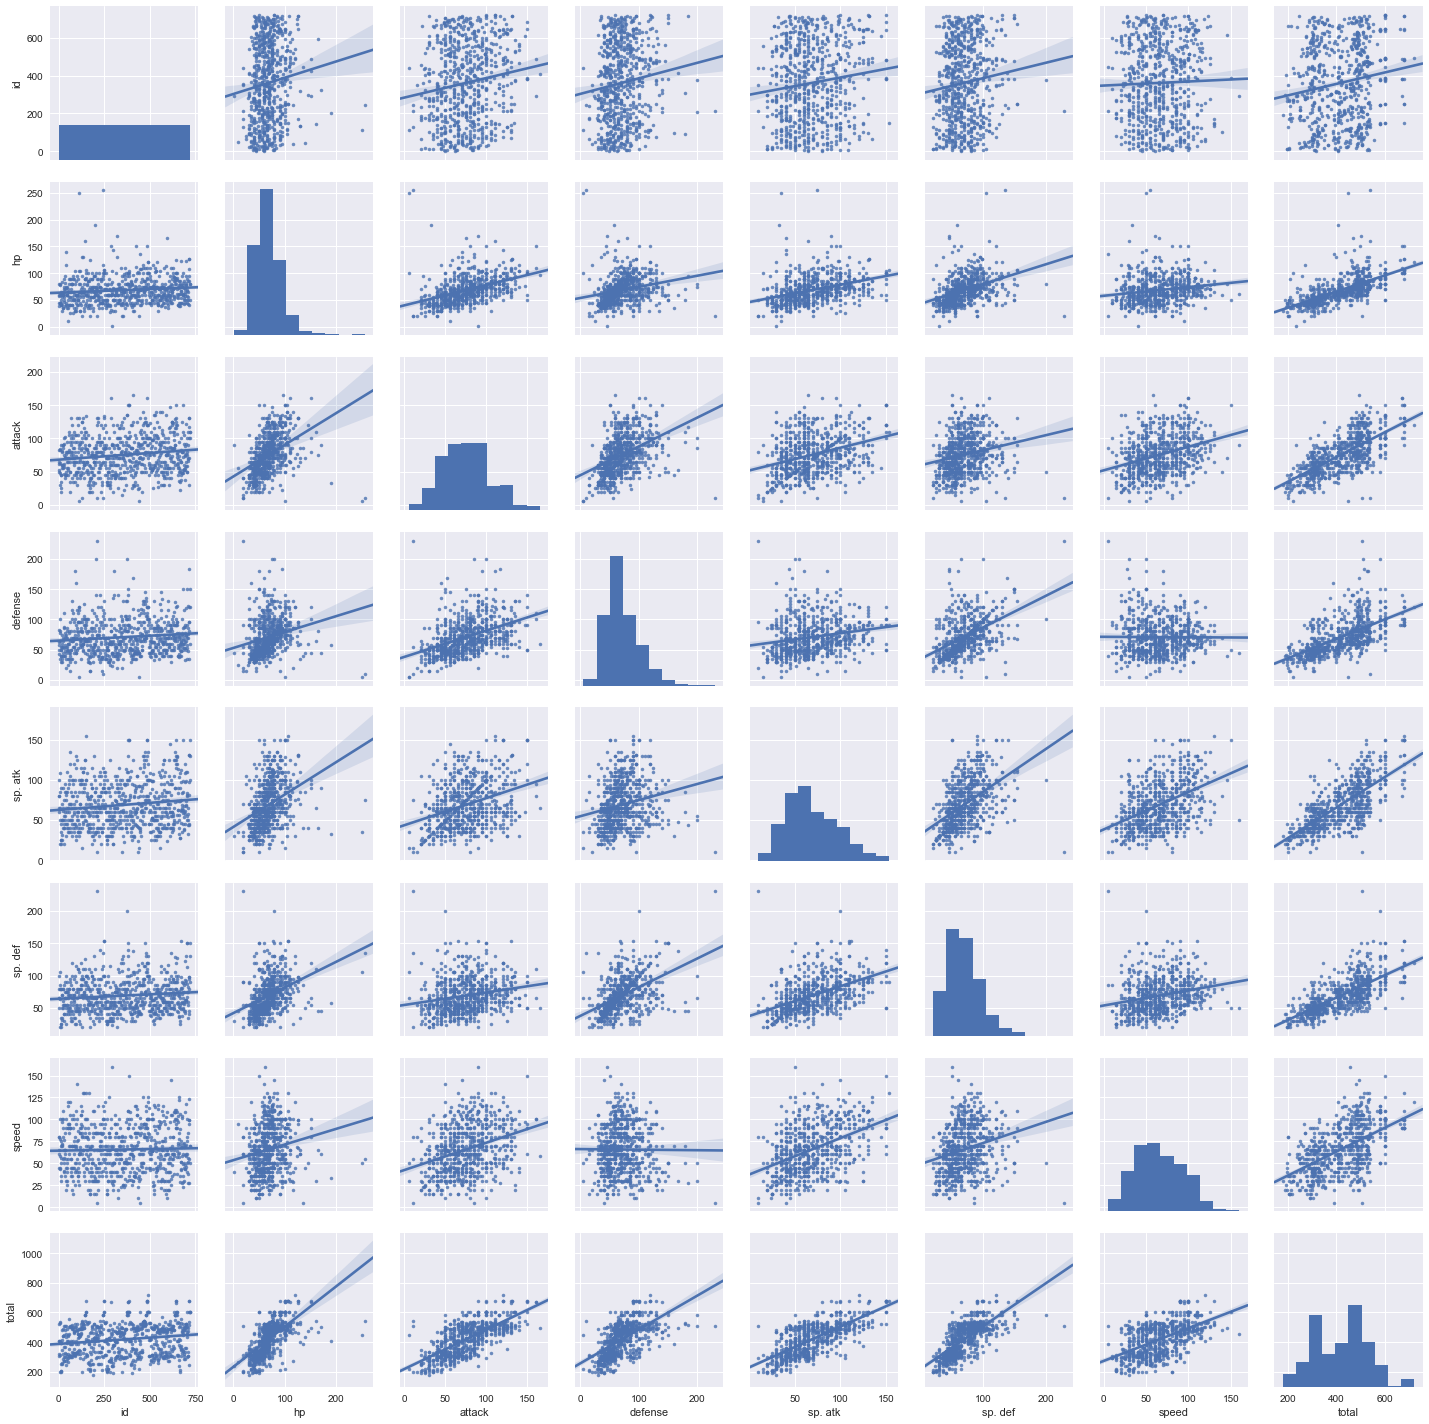

In [21]:
# Try seaborn's pairplot :

sb.pairplot(poke_statistics,kind="reg", markers =["."])

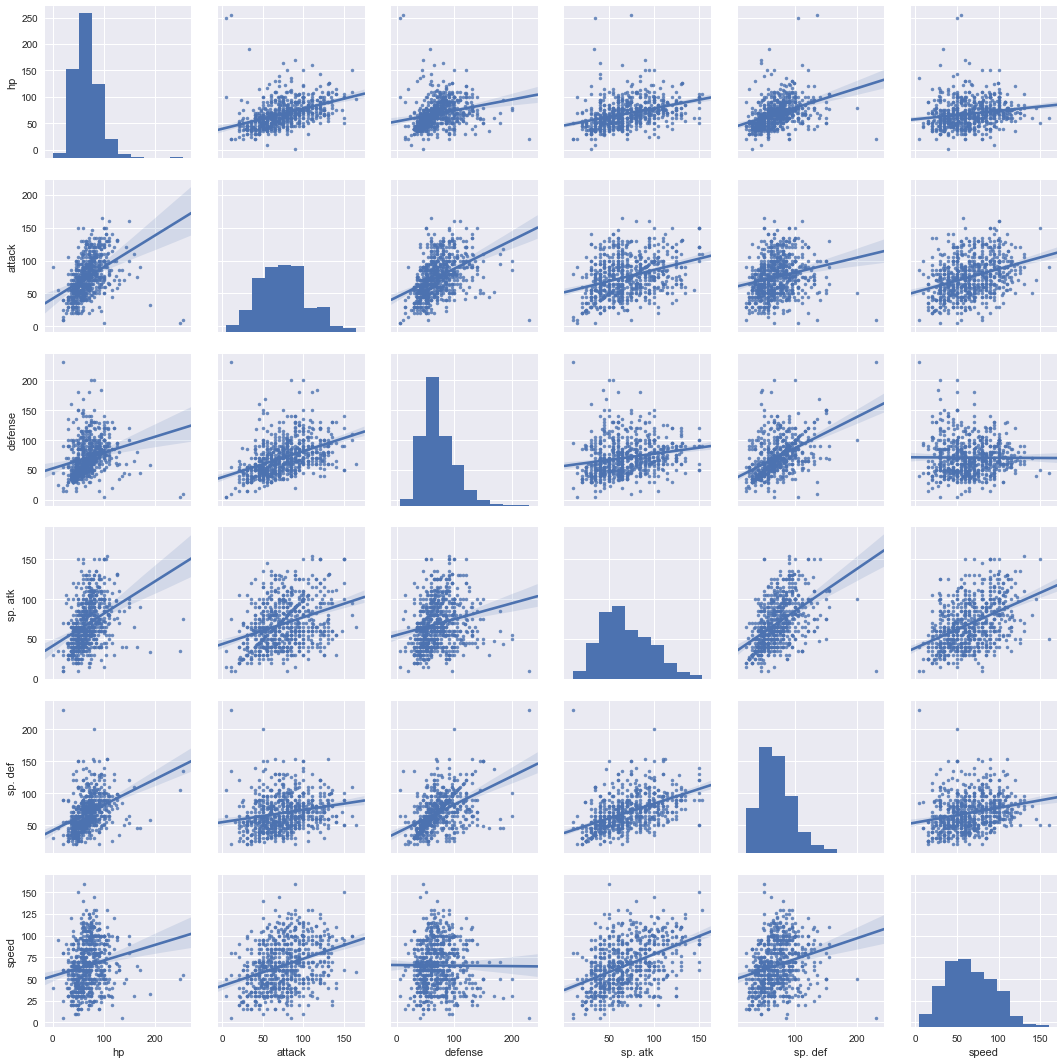

In [22]:
# Get rid of extra columns :
new_poke_statistics = poke_statistics.drop(columns = ['id', 'total'])

sb.pairplot(new_poke_statistics,kind="reg", markers =["."])

In [26]:
#Pairplot with r values :

def corrfunc(x, y, **kwargs):
    """ This function calculates the correlation coefficient(r) between two columns and 
    displays it when used within pairplots """
    
    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r), xy=(0.65, 0.9), xycoords=ax.transAxes)

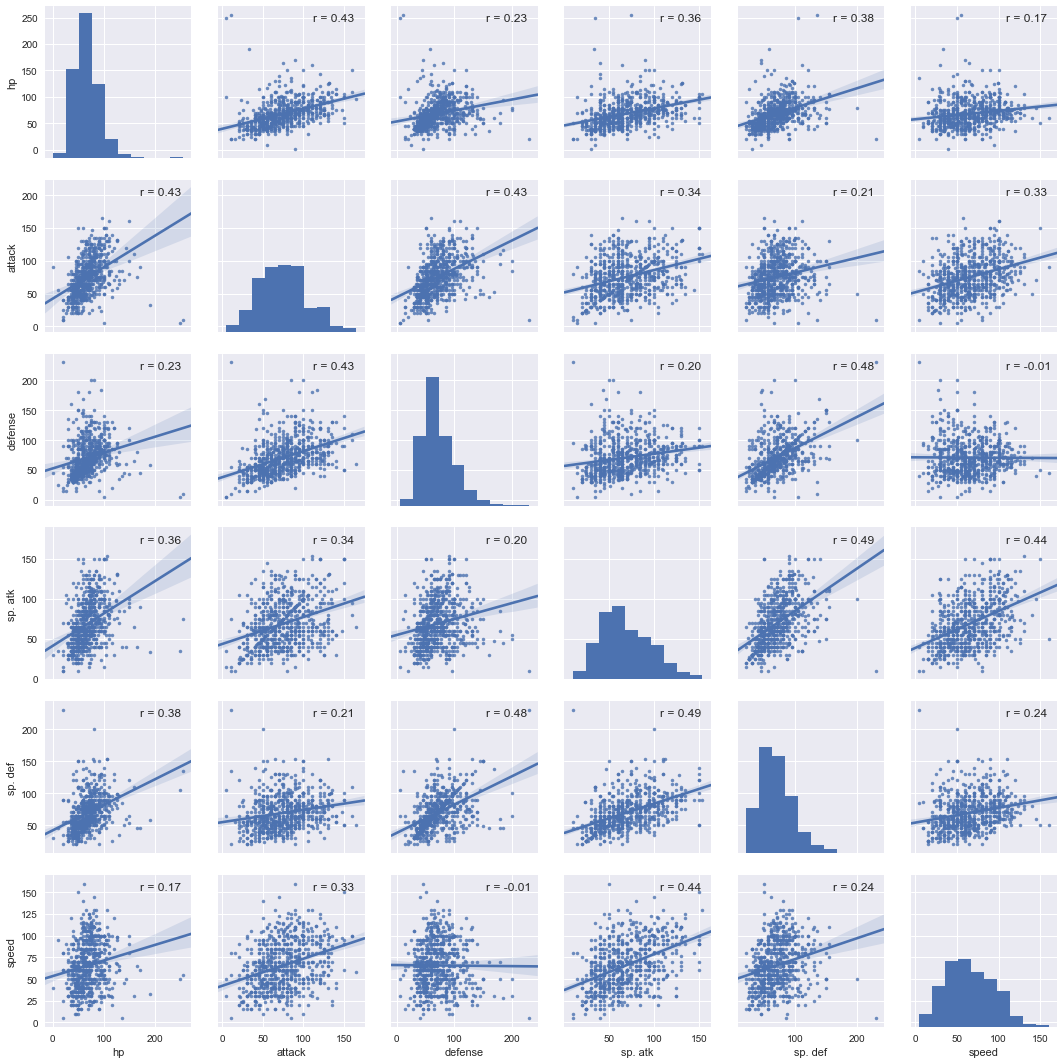

In [51]:
sb.pairplot(new_poke_statistics,kind="reg", markers =["."]).map_offdiag(corrfunc);

##### Summarizing observations/conclusions :
- sp.attack and sp.defence has the highest correlation, followed by defense and sp.defense.
- speed vs defense is the only one which is negatively correlated.

### What are the strongest and weakest Pokemon species?

In [27]:
#Pokemon's strength/weakness is determined its attributes/stats columns available. Total column gives the sum of all attributes
df.sort_values('total', ascending=False).head(15)

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
540,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True


In [3]:
# Why using "Total" is not the best meric ?
- Many different pokemons have the same value of "total". In the above dataset, there is a lot of Pokemon with the total 
  atttribute value of 680 and 670, making it difficult to judge the strength/weakness within themselves.

In [28]:
# Instead, try a different metric: standardize the six statistic columns independently by converting each 
# value into a z-score so when we do take the sum, we account for the variation in the each statistic using 
# its mean and standard deviation across all Pokemon species. 

zscore = new_poke_statistics.apply(lambda x: (x - x.mean()) / x.std())
zscore.head()

,hp,attack,defense,sp. atk,sp. def,speed
0,-0.904510,-0.898676,-0.743199,-0.133184,-0.155405,-0.759379
1,-0.324201,-0.451485,-0.263664,0.385873,0.402229,-0.209484
2,0.449545,0.236501,0.421387,1.077948,1.145741,0.523710
4,-1.136634,-0.795478,-0.948714,-0.306203,-0.713039,-0.026185
5,-0.401575,-0.382687,-0.434926,0.385873,-0.155405,0.523710


In [31]:
# Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, 
# the stronger the Pokemon.

df['strength'] = zscore.sum(axis='columns')
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-3.594354
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-0.460732
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,3.854832
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,-3.926254
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,-0.465011


In [33]:
df.sort_values('strength', ascending=False).head() #This shows the strongest pokemon based on the strength/z-scores

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True,10.878816
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True,9.559583
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True,9.507000
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,9.471754
792,716,Xerneas,Fairy,None,680,126,131,95,131,98,99,6,True,9.425945


In [34]:
df.sort_values('strength', ascending=False).tail() #This shows the weakest pokemon based on the strength/z-scores

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False,-7.966952
288,265,Wurmple,Bug,None,195,45,45,35,20,30,20,3,False,-7.986294
446,401,Kricketot,Bug,None,194,37,25,41,25,41,25,4,False,-8.013015
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False,-8.109822
206,191,Sunkern,Grass,None,180,30,30,30,30,30,30,2,False,-8.541221


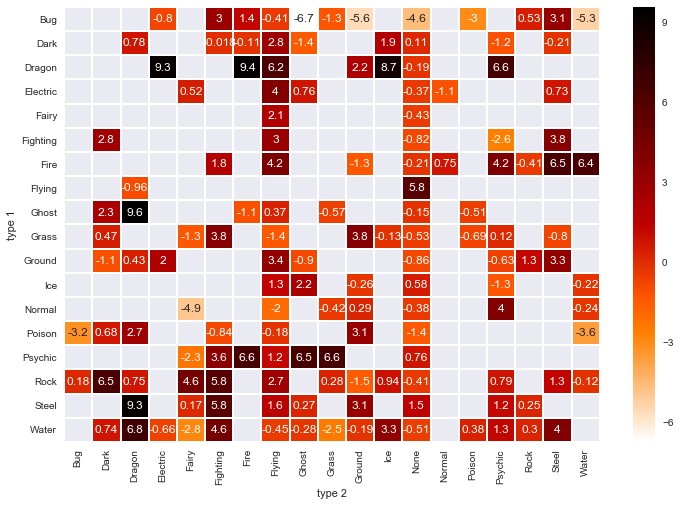

In [50]:
# Repeat the heatmap but now for the new strength metric computed

data = df.groupby(['type 1','type 2'])['strength'].mean().unstack()

plt.figure(figsize=(12, 8))
sb.heatmap(data, annot = True, linewidth = 1, cmap = 'gist_heat_r')

#### Conclusions:
- Pokemon with a primary Dragon type seems to be the strongest species followed by Psychic. As for the secondary types, 
  again Dragon tops the list followed by Fightin.
- Pokemon with Dragon primary type and Fire secondary type is the stongest combination.
- The weakest ones seems to be of Bug primary type and Ground secondary type.

### Do any types of Pokemon excel at certain statistics over others?

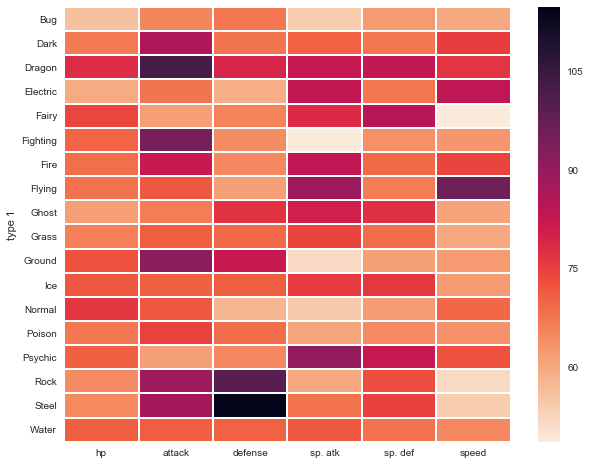

In [45]:
#In order to know if any type of Pokemon excel at any one particular statistics, it is better to plot the type vs 
# their corresponding statistics

type1_stat = df.groupby('type 1').mean().loc[:, 'hp':'speed']
type2_stat = df.groupby('type 2').mean().loc[:, 'hp':'speed']

#heatmap of type 1 vs stats
plt.figure(figsize=(10, 8))
sb.heatmap(type1_stat, cmap='rocket_r', linewidth =1)

#### Conclusion
 - Pokemon with Steel primary type has highest defence followed by Rock type
 - Pokemon with Flying primary type is the fastest
 - Pokemon with Dragon primary type has strongest attack

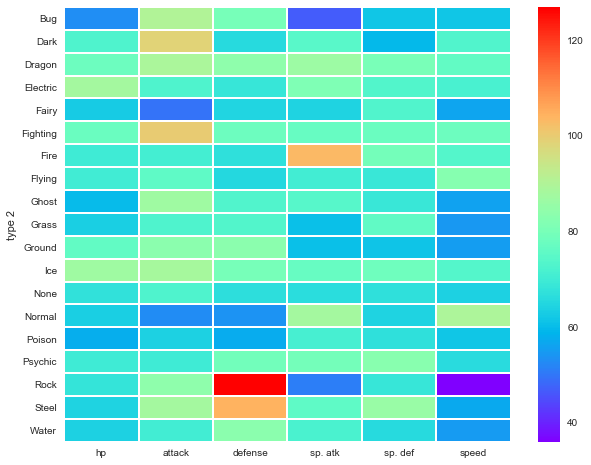

In [47]:
#heatmap of type 2 vs stats
plt.figure(figsize=(10, 8))
sb.heatmap(type2_stat, cmap='rainbow', linewidth =1)

#### Conclusions
 - Pokemon with Rock secondary type also has highest defence followed by Steel 
 - Rock secondary type pokemon however has lowest speen and poor special attack characteristics.
 - Bug secondary type also does not have strong characteristics.

### Are any of the statistics correlated?

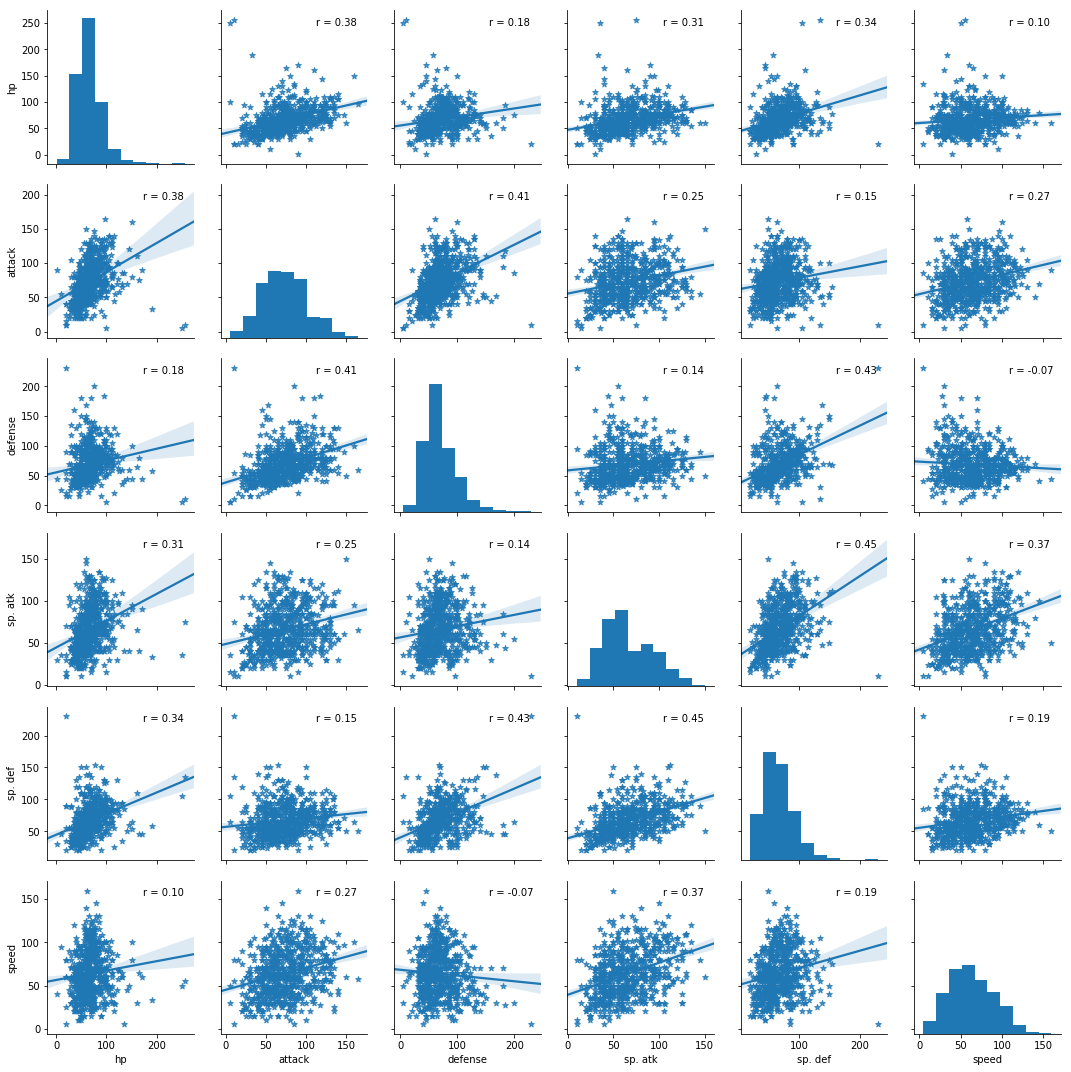

In [28]:
#The only parameter that we have not considered so far for the analysis is 'legendary', and the table shows that 
#majority of the Pokemons are not legendary. So I have now created the corelation plot for non-legendary pokemons. 

df1 = df[df['legendary'] == False].loc[:, 'hp':'speed']
sb.pairplot(df1, kind='reg', markers =['*']).map_offdiag(corrfunc)

#### Summarizig observation :
- The statistics are not highly correlated. The highest correlation is between Sp.Defense ans Sp.Attack, 
   however the correlation value is only 0.45.
- As we had seen in the previous correlation plots, all attributes except defense/speed are positively correlatted.

#### My favorite pokemon is Arceus. Despite being a normal primary type pokemon with no secondary type,  its statistics are very strong.